In [13]:
import numpy as np

def str_to_matrix(state):
    k = 0;
    mat = np.zeros((3, 3), dtype=np.int32)
    for i in range(3):
        for j in range(3):
            mat[i][j] = state[k]
            k += 1
    return mat

def matrix_to_str(mat):
    s = ""
    for t in mat.reshape(9,):
        s += (str)(t)
    return s

def get_zero_index(state):
    ind = 0
    for ch in state:
        if(ch=='0'):
            return ind
        ind += 1

In [14]:
# move '0' in possible directions 
def expand(state):

    # neighbour configurations
    neighbours = []

    # create matrix
    mat = str_to_matrix(state)

    # find index of '0'
    index = get_zero_index(state)
    
    # row and col index of '0'
    i = (int)(index / 3) # row
    j = index % 3; # col

    # move up if possible
    if(i!=0):
        temp_mat = np.copy(mat)
        temp_mat[i][j] = temp_mat[i-1][j]
        temp_mat[i-1][j] = 0
        state = matrix_to_str(temp_mat)
        neighbours.append(state)

    # move down if possible
    if(i!=2):
        temp_mat = np.copy(mat)
        temp_mat[i][j] = temp_mat[i+1][j]
        temp_mat[i+1][j] = 0
        state = matrix_to_str(temp_mat)
        neighbours.append(state)

    # move left if possible
    if(j!=0):
        temp_mat = np.copy(mat)
        temp_mat[i][j] = temp_mat[i][j-1]
        temp_mat[i][j-1] = 0
        state = matrix_to_str(temp_mat)
        neighbours.append(state)

    # move right if possible
    if(j!=2):
        temp_mat = np.copy(mat)
        temp_mat[i][j] = temp_mat[i][j+1]
        temp_mat[i][j+1] = 0
        state = matrix_to_str(temp_mat)
        neighbours.append(state)

    return neighbours

1. Implement the usual A*
for 8-Puzzle, with the Expand function taking a “depth” parameter –
the depth to which each expand call expands.

In [15]:
from collections import deque
from collections import defaultdict
from queue import PriorityQueue

class solver(object):
    
    def __init__(self):
        self.fringe = PriorityQueue()
        self.g = defaultdict(int)
        self.visited = defaultdict(bool)
        self.cameFrom = {}
        
        self.interations = 0
        self.max_fringe_size = -float('inf') 
        self.fringe_growth = []
        
    def stats(self):
        print("iterations : ", self.interations)
        print("final_fringe_size : ", self.fringe.qsize())
        print("max_fringe_size : ", self.max_fringe_size)
        print("total nodes visited : ", len(self.visited))
               
    def reconstruct_path(self, current):
        total_path = deque([current])
        while current in self.cameFrom.keys():
            current = self.cameFrom[current]
            total_path.appendleft(current)
        return total_path
    
    def modified_expand(self, S, depth):
        self.visited[S] = True  
        temp1 = deque([S])
        while depth > 0 :
            temp2 = []
            while len(temp1) :    
                C = temp1.popleft()

                if C == '012345678':
                    temp1.appendleft(C)
                    return temp1

                temp3 = filter(lambda x: not self.visited[x] 
                               or self.g[x]>self.g[C]+1, expand(C))
                temp3 = list(temp3)
                for t in temp3:
                    self.g[t] = self.g[C] + 1
                    self.cameFrom[t] = C
                    self.visited[t] = True
                temp2.extend(temp3)

            depth -= 1
            temp1 = deque(temp2)
        return temp1

    def modified_astar(self, I, h, depth):
        self.g[I] = 0  
        self.interations = 0
        S = I
        while S != "012345678" :
            temp = self.modified_expand(S, depth)
            for T in temp:
                f = self.g[T] + h(T)
                self.fringe.put((f, T)) 

            if self.fringe.qsize() > self.max_fringe_size :
                self.max_fringe_size = self.fringe.qsize()
                
            self.fringe_growth.append(self.fringe.qsize())
            
            if self.fringe.empty():
                return []

            S = self.fringe.get()[1]
            self.interations += 1

        return self.reconstruct_path("012345678")

2. Implement both the usual heuristics: tile mismatch count and manhattan distance.

In [16]:
# manhatten distance sum heuristic
def manhattan_distance(state):
    ij = [0 for i in range(9)]
    for index, ch in enumerate(state):      
        i = (int)(index / 3) # row
        j = index % 3; # col
        ij[(int)(ch)] = ((i,j))
    
    dist_sum = 0
    for index in range(1,9):
        i = (int)(index / 3) # row
        j = index % 3; # col
        dx = abs(i - ij[index][0])
        dy = abs(j - ij[index][1])
        dist = dx + dy      
        dist_sum += dist
    
    return dist_sum

In [17]:
# tile mismatch count heuristic
def tile_mismatch(state):
    mismatch = 0
    goal = "012345678"
    for i in range(9):
        if goal[i] != state[i]:
            mismatch += 1
    return mismatch

3. In the main function, read the depth parameter as input, get the InitialState, and call the A*
solver twice for each heuristic: once with the input depth parameter, and then again with the
parameter being 1 (which is the usual Expand).
Thus the total number of times that the puzzle will be solved by A*
is 4.

In [19]:
def display_results(solver, path) :
    solver.stats()
    print("PATH LENGTH : ", len(path), "\nPATH : ", path, "\n")

def main():
    depth = (int)(input("enter depth : "))
    initial_state = input("enter initial state : ")
    
    # A* using manhattan_distance heuristic
    solver11 = solver()
    print("RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH = ", depth)
    path11 = solver11.modified_astar(initial_state, manhattan_distance, depth)
    display_results(solver11, path11)    
    solver12 = solver()
    print("RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH = ", 1)
    path12 = solver12.modified_astar(initial_state, manhattan_distance, 1)
    display_results(solver12, path12)
    
    
    # A* using tile mis-match heuristic
    solver21 = solver()
    print("RESULTS FROM USING TILE MISMATCH HEURISTIC WITH DEPTH = ", depth)
    path21 = solver21.modified_astar(initial_state, tile_mismatch, depth)
    display_results(solver21, path21)    
    solver22 = solver()
    print("RESULTS FROM USING TILE MISMATCH HEURISTIC WITH DEPTH = ", 1)
    path22 = solver22.modified_astar(initial_state, tile_mismatch, 1)
    display_results(solver22, path22)

main()

enter depth :  8
enter initial state :  721658304


RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH =  8
iterations :  127
final_fringe_size :  5523
max_fringe_size :  5524
total nodes visited :  14596
PATH LENGTH :  24 
PATH :  deque(['721658304', '721608354', '721680354', '721684350', '721684305', '721604385', '701624385', '710624385', '714620385', '714602385', '714062385', '014762385', '104762385', '140762385', '142760385', '142765380', '142765308', '142705368', '142075368', '142375068', '142375608', '142305678', '102345678', '012345678']) 

RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH =  1
iterations :  1174
final_fringe_size :  672
max_fringe_size :  673
total nodes visited :  1827
PATH LENGTH :  24 
PATH :  deque(['721658304', '721608354', '721680354', '721684350', '721684305', '721604385', '701624385', '710624385', '714620385', '714602385', '714062385', '014762385', '104762385', '140762385', '142760385', '142765380', '142765308', '142705368', '142075368', '142375068', '142375608', '142305678', '102345678', '012345678']) 



4. Compare the results of all the four calls for at least 10 randomly generated initial states for
optimality. Make sure this is done in the program itself.

In [20]:
import random
def random_initial_state():
    tiles = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
    initial_state = ''
    window = 8
    for i in range(9):
        r = random.randint(0, window)
        initial_state += tiles[r]

        temp = tiles[window]
        tiles[window] = tiles[r]
        tiles[r] = temp

        window -= 1

    return initial_state

initial_states = set()
while len(initial_states) < 10 :
    state = random_initial_state()
    initial_states.add(state)

In [21]:
for initial_state in initial_states:
    initial_state = random_initial_state()
    depth = random.randint(1,10)
    
    print("INITIAL STATE : ", initial_state)
    print("DEPTH VALUE : ", depth, '\n')
    
    # A* using manhattan_distance heuristic
    solver11 = solver()
    print("RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH = ", depth)
    path11 = solver11.modified_astar(initial_state, manhattan_distance, depth)
    display_results(solver11, path11)    
    solver12 = solver()
    print("RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH = ", 1)
    path12 = solver12.modified_astar(initial_state, manhattan_distance, 1)
    display_results(solver12, path12)
    
    
    # A* using tile mis-match heuristic
    solver21 = solver()
    print("RESULTS FROM USING TILE MISMATCH HEURISTIC WITH DEPTH = ", depth)
    path21 = solver21.modified_astar(initial_state, tile_mismatch, depth)
    display_results(solver21, path21)    
    solver22 = solver()
    print("RESULTS FROM USING TILE MISMATCH HEURISTIC WITH DEPTH = ", 1)
    path22 = solver22.modified_astar(initial_state, tile_mismatch, 1)
    display_results(solver22, path22)
    
    print("\n=================================================================\n")

INITIAL STATE :  374086152
DEPTH VALUE :  5 

RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH =  5
iterations :  71852
final_fringe_size :  0
max_fringe_size :  39869
total nodes visited :  181440
PATH LENGTH :  0 
PATH :  [] 

RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH =  1
iterations :  195649
final_fringe_size :  0
max_fringe_size :  20827
total nodes visited :  181440
PATH LENGTH :  0 
PATH :  [] 

RESULTS FROM USING TILE MISMATCH HEURISTIC WITH DEPTH =  5
iterations :  67602
final_fringe_size :  0
max_fringe_size :  42681
total nodes visited :  181440
PATH LENGTH :  0 
PATH :  [] 

RESULTS FROM USING TILE MISMATCH HEURISTIC WITH DEPTH =  1
iterations :  182553
final_fringe_size :  0
max_fringe_size :  23109
total nodes visited :  181440
PATH LENGTH :  0 
PATH :  [] 



INITIAL STATE :  765130248
DEPTH VALUE :  2 

RESULTS FROM USING MANHATTEN HEURISTIC WITH DEPTH =  2
iterations :  381
final_fringe_size :  623
max_fringe_size :  624
total nodes visited :  1673
PATH LENGTH

5. Compare the computational costs (number of nodes generated and the maximum length of the
fringe throughout) of all the four calls for the different initial states.

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

dlimit = 30
initial_state = random.sample(initial_states, k=1)

# Data for plotting
depth = np.arange(1, dlimit)
max_fringe_manhatten = []
iteration_manhatten = []
max_fringe_tile_mismatch = []
iteration_tile_mismatch = []

for i in range(1, dlimit):
    sl = solver()
    path = sl.modified_astar(initial_state, manhattan_distance, i)
    max_fringe_manhatten.append(sl.max_fringe_size)
    iteration_manhatten.append(sl.interations )
    
    sl = solver()
    path = sl.modified_astar(initial_state, tile_mismatch, i)
    max_fringe_tile_mismatch.append(sl.max_fringe_size)
    iteration_tile_mismatch.append(sl.interations )

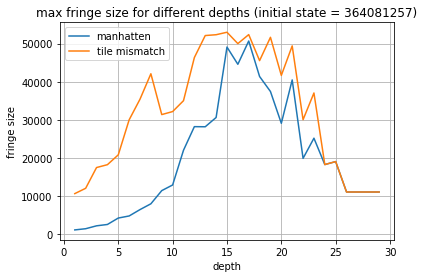

In [11]:
fig, ax = plt.subplots()
ax.plot(depth, max_fringe_manhatten, label="manhatten")
ax.plot(depth, max_fringe_tile_mismatch, label="tile mismatch")

ax.set(xlabel='depth', ylabel='fringe size',
       title=f'max fringe size for different depths (initial state = {initial_state})')
ax.grid()
ax.legend()

fig.savefig("frigeSize_vs_depth.png")
plt.show()

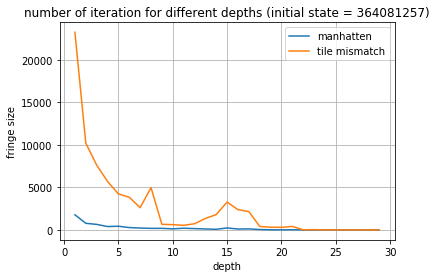

In [12]:
fig, ax = plt.subplots()
ax.plot(depth, iteration_manhatten, label="manhatten")
ax.plot(depth, iteration_tile_mismatch, label="tile mismatch")

ax.set(xlabel='depth', ylabel='fringe size',
       title=f'number of iteration for different depths (initial state = {initial_state})')
ax.grid()
ax.legend()

fig.savefig("iterations_vs_depth.png")
plt.show()